In [1]:
import pandas as pd
data=pd.read_csv(r'Phishing_Email.csv', index_col=[0])

In [2]:
data.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [3]:
data["Email Type"] = data["Email Type"].map({'Safe Email':0, 'Phishing Email':1})

In [4]:
data.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1


In [5]:
data['Email Type'].value_counts()

0    11322
1     7328
Name: Email Type, dtype: int64

In [6]:
from sklearn.utils import resample
majority=data[data["Email Type"]==0]
minority=data[data["Email Type"]==1]
downsample=resample(majority, replace=False,n_samples=7328, random_state=42)
data=pd.concat([downsample, minority])

In [7]:
data['Email Type'].value_counts()

0    7328
1    7328
Name: Email Type, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X = data.drop(columns =[ "Email Type"], axis=1)
Y = data["Email Type"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
    test_size=0.2, random_state= 42)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile
import numpy as np

# Assuming you have a DataFrame 'data' with an 'Email Text' column and a 'target' column (0 or 1)

# Step 1: Impute missing values
data['Email Text'].fillna('', inplace=True)

# Step 2: Tokenization is done implicitly by the TF-IDF vectorizer.

# Step 3: Text Vectorization (TF-IDF)
tv = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 3), max_features=5000)
X = tv.fit_transform(data['Email Text'])


# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, data['Email Type'], test_size=0.2, random_state=42)

# Step 5: Feature Selection
selector = SelectPercentile(percentile=5)
selector.fit(X_train, y_train)
X_train = selector.transform(X_train).toarray()
X_test = selector.transform(X_test).toarray()

# Step 6: Data Type Conversion
X_train = X_train.astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [10]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
# Neural network

model = Sequential()
model.add(Dense(16, input_dim=250, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_split=0.2)


Epoch 1/100
147/147 [==============================] - 2s 2ms/step - loss: 0.6654 - accuracy: 0.6249 - val_loss: 0.5274 - val_accuracy: 0.9424
Epoch 2/100
147/147 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.8436 - val_loss: 0.1935 - val_accuracy: 0.9497
Epoch 3/100
147/147 [==============================] - 0s 989us/step - loss: 0.2713 - accuracy: 0.9040 - val_loss: 0.1387 - val_accuracy: 0.9539
Epoch 4/100
147/147 [==============================] - 0s 975us/step - loss: 0.2382 - accuracy: 0.9167 - val_loss: 0.1301 - val_accuracy: 0.9574
Epoch 5/100
147/147 [==============================] - 0s 966us/step - loss: 0.2198 - accuracy: 0.9229 - val_loss: 0.1217 - val_accuracy: 0.9565
Epoch 6/100
147/147 [==============================] - 0s 1ms/step - loss: 0.2033 - accuracy: 0.9286 - val_loss: 0.1155 - val_accuracy: 0.9595
Epoch 7/100
147/147 [==============================] - 0s 931us/step - loss: 0.1966 - accuracy: 0.9294 - val_loss: 0.1143 - val_accuracy

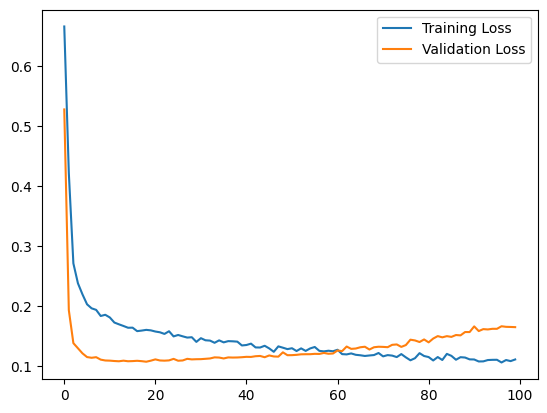

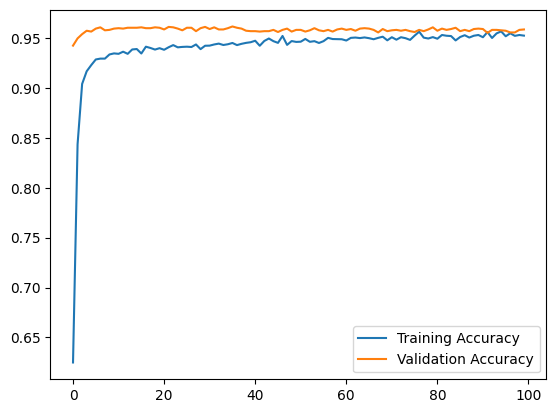

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [12]:
model.save("FirstANNModel.h5")

In [13]:
from keras.models import load_model
model=load_model("FirstANNModel.h5")

In [14]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

92/92 [==============================] - 0s 452us/step


In [15]:
from sklearn.metrics import classification_report
report = classification_report(y_true=Y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1464
           1       0.93      0.96      0.94      1468

    accuracy                           0.94      2932
   macro avg       0.94      0.94      0.94      2932
weighted avg       0.94      0.94      0.94      2932



92/92 [==============================] - 0s 403us/step
Classification report:

               precision    recall  f1-score   support

           0       0.96      0.93      0.94      1464
           1       0.93      0.96      0.94      1468

    accuracy                           0.94      2932
   macro avg       0.94      0.94      0.94      2932
weighted avg       0.94      0.94      0.94      2932


Confusion Matrix:



<Axes: >

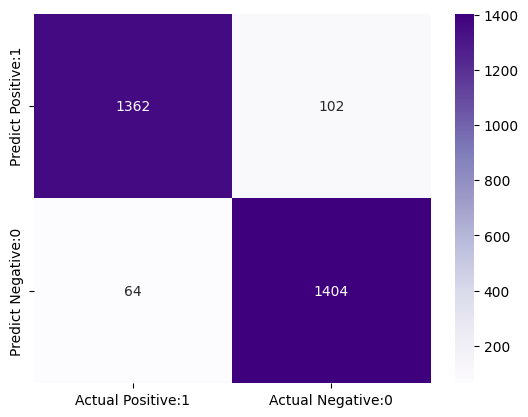

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
pred=model.predict(X_test)

threshold = 0.5
predictions = np.where(pred < threshold, 0, 1)
class_report = classification_report(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test,predictions)
acc = accuracy_score(Y_test, predictions)
Y_pred = np.array(model.predict(X_test))
conf_mat = pd.DataFrame(confusion_matrix(Y_test, predictions),
                        columns=["Pred.Negative", "Pred.Positive"],
                        index=['Act.Negative', "Act.Positive"])

print("Classification report:\n\n", class_report)

# visualize confusion matrix with seaborn heatmap
print("\nConfusion Matrix:\n")
cm_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Purples')

In [17]:
import tensorflow as tf

model = tf.keras.models.load_model('FirstANNModel.h5')

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile
from keras.models import load_model

# Load the trained model
model = load_model("FirstANNModel.h5")

# Load the TF-IDF vectorizer used during training
vectorizer = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 3), max_features=250)

# Fit the vectorizer to your training data
x_train = data['Email Text']
y_train = data['Email Type']

vectorizer.fit(x_train)

# Input from the user
user_input = input("Enter the content of the email: ")

# Preprocess the user input using the pre-fitted vectorizer
user_input = vectorizer.transform([user_input]).toarray()
user_input = user_input.reshape(1, -1)  # Reshape to match the model's expected input shape

# Make a prediction
prediction_prob = model.predict(user_input)
prediction = (prediction_prob > 0.5).astype(int)

# Interpret the prediction
if prediction[0] == 1:  # Note the [0] to access the first (and only) element of the array
    print("This email is detected to be a phishing email.")
else:
    print("This email is detected to be a safe email.")


Enter the content of the email:  hi


1/1 [==============================] - 0s 42ms/step
This email is detected to be a phishing email.
